In [1]:
import sys
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
label_size = 24
matplotlib.rc('font', size=label_size) 

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle

from astropy.io import ascii, fits
from astropy.table import Table


import warnings
warnings.filterwarnings("once")

In [7]:
# hdu = fits.open('/Users/xwou/Documents/Research/MIT/spectro_photo_parallax_DR17/spec_infer_parallax/data/training_labels_new_N94_lam30_K2_offset0.017_parallax_run1.fits')
hdu = fits.open('/Users/xwou/Documents/Research/MIT/spectro_photo_parallax_DR17/spec_download_norm/data/training_labels_new_N120309_lam140_K2_offset0.017_parallax_run1.fits')
labels = Table(hdu[1].data)
hdu.close()

In [8]:
labels

apogee_id,parallax,parallax_error,parallax_over_error,bp_rp,phot_g_mean_flux,phot_bp_mean_flux,phot_rp_mean_flux,phot_g_mean_flux_error,phot_bp_mean_flux_error,phot_rp_mean_flux_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,visibility_periods_used,astrometric_gof_al,astrometric_chi2_al,astrometric_n_good_obs_al,source_id,original_ext_source_id,angular_distance,xm_flag,allwise_oid,number_of_neighbours,number_of_mates,designation,w1mpro,w2mpro,w1mpro_error,w2mpro_error,APOGEE_ID,LOGG,J,H,K,J_ERR,H_ERR,K_ERR,EXTRATARG,GAIAEDR3_SOURCE_ID,TELESCOPE,FIELD,FILE,spec_parallax,spec_parallax_err
str22,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,int16,float32,float32,int16,int64,str255,float32,int16,int32,int16,int16,str19,float64,float64,float64,float64,str30,float32,float32,float32,float32,float32,float32,float32,int32,int64,str6,str20,str36,float64,float64
b'2M00000002+7417074',0.30244166433846853,0.01947503,14.656802,2.7766848,393926.9303916319,67068.36002689962,502264.7149217262,284.58813,247.08754,746.22296,11.698828,13.272248,10.4955635,25,0.4538917,1600.5779,348,538028216707715712,J000000.04+741707.5,0.0262377,8,733278841,1,0,J000000.04+741707.5,7.257,7.353,0.025,0.02,2M00000002+7417074,0.9045983,8.597,7.667,7.314,0.039,0.029,0.018,0,538028216707715712,apo25m,120+12,apStar-dr17-2M00000002+7417074.fits,0.297059880662375,0.023560492123473463
b'2M00000317+5821383',0.3768518599357177,0.019697534,18.268879,2.4337177,657139.7779891618,141511.31328708443,772715.6268454853,253.65714,195.45905,493.22546,11.143223,12.461564,10.027846,26,0.80899864,1831.617,403,422737314373993984,J000003.17+582138.3,0.032791663,8,689699320,1,0,J000003.17+582138.3,6.804,6.951,0.059,0.019,2M00000317+5821383,0.9987238,8.206,7.279,6.946,0.021,0.027,0.021,0,422737314373993984,apo25m,116-04,apStar-dr17-2M00000317+5821383.fits,0.45075045780797895,0.033582329059023155
b'2M00000546+6152107',0.38239398019592474,0.015403932,23.720825,2.2295256,407996.6344642014,100507.57903902336,454726.8453716747,81.95807,85.40096,218.34204,11.660726,12.833045,10.603519,25,-3.5061915,889.5191,411,429530195985183744,J000005.49+615210.7,0.10692527,8,701716063,1,0,J000005.49+615210.7,7.523,7.682,0.043,0.033,2M00000546+6152107,1.2815037,9.013,8.029,7.745,0.063,0.057,0.02,0,429530195985183744,apo25m,116+00,apStar-dr17-2M00000546+6152107.fits,0.33999273732728913,0.02126305516257687
b'2M00000717-7213573',-0.00782243151404417,0.05112986,-0.4854782,1.4345684,3027.705116968479,1190.1605642647546,2589.2509179560357,1.9596428,11.778788,10.418661,16.984583,17.649529,16.21496,25,0.31948283,400.38895,380,4701763512829847808,J000007.17-721357.2,0.04410313,8,20002330,1,0,J000007.17-721357.2,14.342,14.443,0.026,0.04,2M00000717-7213573,2.1463056,15.187,14.516,14.492,0.049,0.064,0.096,1,4701763512829847808,lco25m,SMC12,asStar-dr17-2M00000717-7213573.fits,0.02061405713851216,0.0039590758676652914
b'2M00000797+6436119',0.20180602737244413,0.05470353,3.37832,3.112812,3129.6627869870986,417.1917176712446,4257.96283234669,2.0576413,8.886681,8.657259,16.948624,18.787703,15.6748905,26,-0.33214045,436.3897,413,431771039351005184,J000007.99+643612.0,0.047733244,8,710201285,1,0,J000007.99+643612.0,11.253,11.25,0.021,0.02,2M00000797+6436119,2.1282876,13.239,12.109,11.703,0.024,0.029,0.019,0,431771039351005184,apo25m,117+01,apStar-dr17-2M00000797+6436119.fits,0.1446931053281684,0.011796084423676358
b'2M00001493+5534446',0.2679185437711845,0.014997744,16.73042,2.036028,130473.06622114642,36436.07938598823,137938.03159441674,36.02776,46.424988,96.67613,12.898564,13.934713,11.898685,26,4.5510807,1156.0371,543,420513826985325696,J000014.93+553444.6,0.048711292,8,679145295,1,0,J000014.93+553444.6,9.168,9.314,0.022,0.02,2M00001493+5534446,1.1980178,10.372,9.503,9.269,0.021,0.03,0.023,0,420513826985325696,apo25m,NGC7789_btx,apStar-dr17-2M00001493+5534446.fits,0.1917256287433574,0.010863600196808078
b'2M00001649-7342309',0.03726452147181784,0.054416753,0

In [21]:
labels

apogee_id,parallax,parallax_error,parallax_over_error,bp_rp,phot_g_mean_flux,phot_bp_mean_flux,phot_rp_mean_flux,phot_g_mean_flux_error,phot_bp_mean_flux_error,phot_rp_mean_flux_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,visibility_periods_used,astrometric_gof_al,astrometric_chi2_al,astrometric_n_good_obs_al,source_id,original_ext_source_id,angular_distance,xm_flag,allwise_oid,number_of_neighbours,number_of_mates,designation,w1mpro,w2mpro,w1mpro_error,w2mpro_error,APOGEE_ID,LOGG,J,H,K,J_ERR,H_ERR,K_ERR,EXTRATARG,GAIAEDR3_SOURCE_ID,TELESCOPE,FIELD,FILE,spec_parallax,spec_parallax_err
str22,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,int16,float32,float32,int16,int64,str255,float32,int16,int32,int16,int16,str19,float64,float64,float64,float64,str30,float32,float32,float32,float32,float32,float32,float32,int32,int64,str6,str20,str36,float64,float64
b'2M00000002+7417074',0.30244166433846853,0.01947503,14.656802,2.7766848,393926.9303916319,67068.36002689962,502264.7149217262,284.58813,247.08754,746.22296,11.698828,13.272248,10.4955635,25,0.4538917,1600.5779,348,538028216707715712,J000000.04+741707.5,0.0262377,8,733278841,1,0,J000000.04+741707.5,7.257,7.353,0.025,0.02,2M00000002+7417074,0.9045983,8.597,7.667,7.314,0.039,0.029,0.018,0,538028216707715712,apo25m,120+12,apStar-dr17-2M00000002+7417074.fits,2.3417681642237254e-12,4.543031696667291e-14
b'2M00000317+5821383',0.3768518599357177,0.019697534,18.268879,2.4337177,657139.7779891618,141511.31328708443,772715.6268454853,253.65714,195.45905,493.22546,11.143223,12.461564,10.027846,26,0.80899864,1831.617,403,422737314373993984,J000003.17+582138.3,0.032791663,8,689699320,1,0,J000003.17+582138.3,6.804,6.951,0.059,0.019,2M00000317+5821383,0.9987238,8.206,7.279,6.946,0.021,0.027,0.021,0,422737314373993984,apo25m,116-04,apStar-dr17-2M00000317+5821383.fits,9.485789145099545e-12,2.1259747688271526e-13
b'2M00000546+6152107',0.38239398019592474,0.015403932,23.720825,2.2295256,407996.6344642014,100507.57903902336,454726.8453716747,81.95807,85.40096,218.34204,11.660726,12.833045,10.603519,25,-3.5061915,889.5191,411,429530195985183744,J000005.49+615210.7,0.10692527,8,701716063,1,0,J000005.49+615210.7,7.523,7.682,0.043,0.033,2M00000546+6152107,1.2815037,9.013,8.029,7.745,0.063,0.057,0.02,0,429530195985183744,apo25m,116+00,apStar-dr17-2M00000546+6152107.fits,1.82587178592164e-12,6.016393432687444e-14
b'2M00000717-7213573',-0.00782243151404417,0.05112986,-0.4854782,1.4345684,3027.705116968479,1190.1605642647546,2589.2509179560357,1.9596428,11.778788,10.418661,16.984583,17.649529,16.21496,25,0.31948283,400.38895,380,4701763512829847808,J000007.17-721357.2,0.04410313,8,20002330,1,0,J000007.17-721357.2,14.342,14.443,0.026,0.04,2M00000717-7213573,2.1463056,15.187,14.516,14.492,0.049,0.064,0.096,1,4701763512829847808,lco25m,SMC12,asStar-dr17-2M00000717-7213573.fits,9.870555778219026e-20,4.177928997287233e-21
b'2M00000797+6436119',0.20180602737244413,0.05470353,3.37832,3.112812,3129.6627869870986,417.1917176712446,4257.96283234669,2.0576413,8.886681,8.657259,16.948624,18.787703,15.6748905,26,-0.33214045,436.3897,413,431771039351005184,J000007.99+643612.0,0.047733244,8,710201285,1,0,J000007.99+643612.0,11.253,11.25,0.021,0.02,2M00000797+6436119,2.1282876,13.239,12.109,11.703,0.024,0.029,0.019,0,431771039351005184,apo25m,117+01,apStar-dr17-2M00000797+6436119.fits,4.3108528588606435e-18,8.200440644355529e-20
b'2M00001493+5534446',0.2679185437711845,0.014997744,16.73042,2.036028,130473.06622114642,36436.07938598823,137938.03159441674,36.02776,46.424988,96.67613,12.898564,13.934713,11.898685,26,4.5510807,1156.0371,543,420513826985325696,J000014.93+553444.6,0.048711292,8,679145295,1,0,J000014.93+553444.6,9.168,9.314,0.022,0.02,2M00001493+5534446,1.1980178,10.372,9.503,9.269,0.021,0.03,0.023,0,420513826985325696,apo25m,NGC7789_btx,apStar-dr17-2M00001493+5534446.fits,3.431019928384568e-14,5.571443182873334e-16
b'2M00001649-7342309',0.0372645

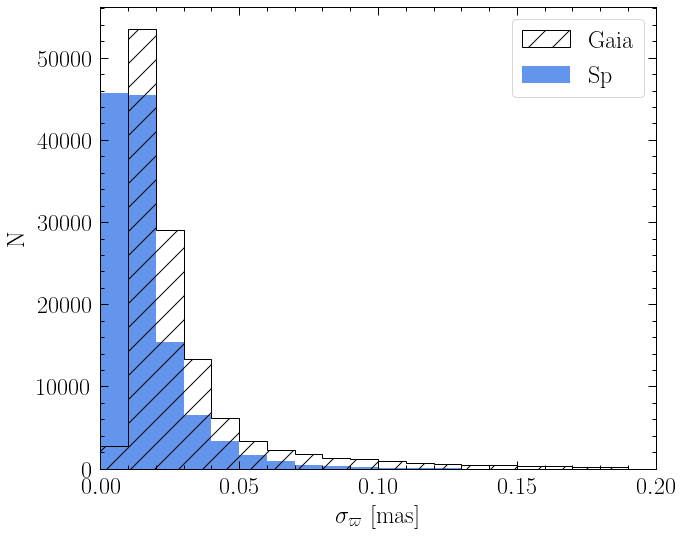

In [19]:
f = plt.figure(figsize=[10,8])
plt.hist(labels['parallax_error'], bins=np.arange(0,0.2,0.01),histtype='step',label='Gaia',zorder=1,hatch='/',color='k')
plt.hist(labels['spec_parallax_err'], bins=np.arange(0,0.2,0.01),histtype='stepfilled',label='Sp',zorder=0)
plt.xlim([0,0.2])
plt.xlabel(r'$\sigma_{\varpi}$ [mas]')
plt.ylabel('N')
plt.legend()
plt.tight_layout()
plt.show()
f.savefig('error_compare.png')

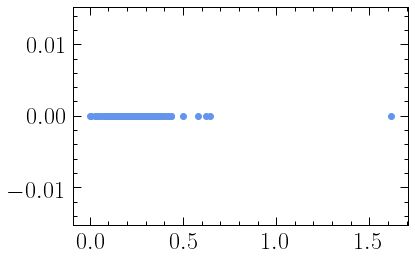

In [4]:
plt.scatter(labels['parallax'], labels['spec_parallax'])
plt.show()

In [5]:
min(labels['parallax'])

0.00117698667162899

(array([1.00000e+00, 1.00000e+00, 3.00000e+00, 1.10000e+02, 1.20113e+05,
        7.00000e+01, 4.00000e+00, 5.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([-9.87227128, -7.57988694, -5.28750259, -2.99511824, -0.70273389,
         1.58965045,  3.8820348 ,  6.17441915,  8.4668035 , 10.75918784,
        13.05157219]),
 <a list of 10 Patch objects>)

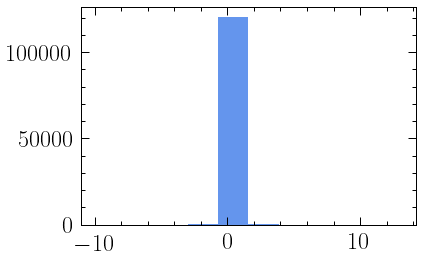

In [9]:
plt.hist(labels['parallax'])

(array([92.,  2.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([4.22674593e-20, 7.30646526e-12, 1.46129305e-11, 2.19193957e-11,
        2.92258609e-11, 3.65323261e-11, 4.38387913e-11, 5.11452566e-11,
        5.84517218e-11, 6.57581870e-11, 7.30646522e-11]),
 <a list of 10 Patch objects>)

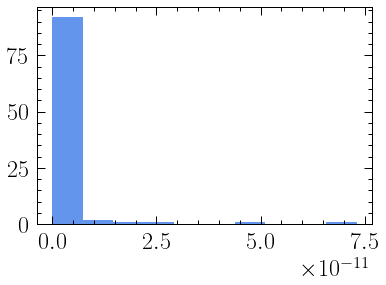

In [17]:
plt.hist(labels['spec_parallax'])

In [24]:
np.sum([True, False, True])

2